In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [166]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [167]:
df.select_dtypes(include=np.number).corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [168]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [170]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: >

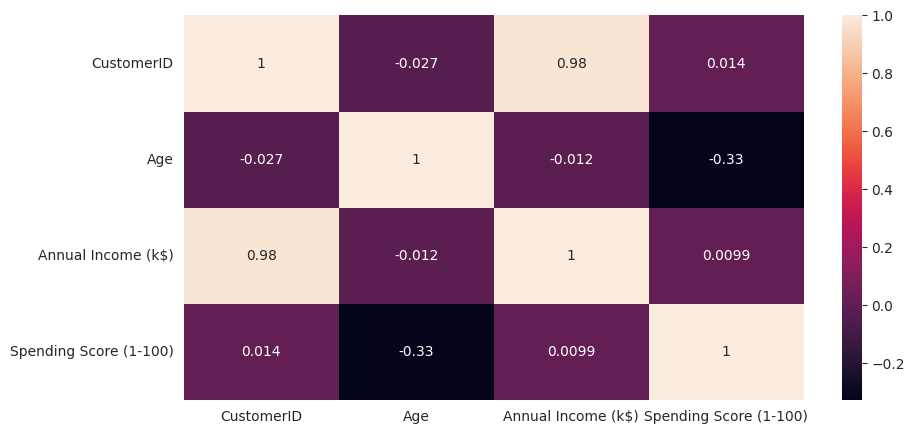

In [171]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

Text(0, 0.5, 'Count')

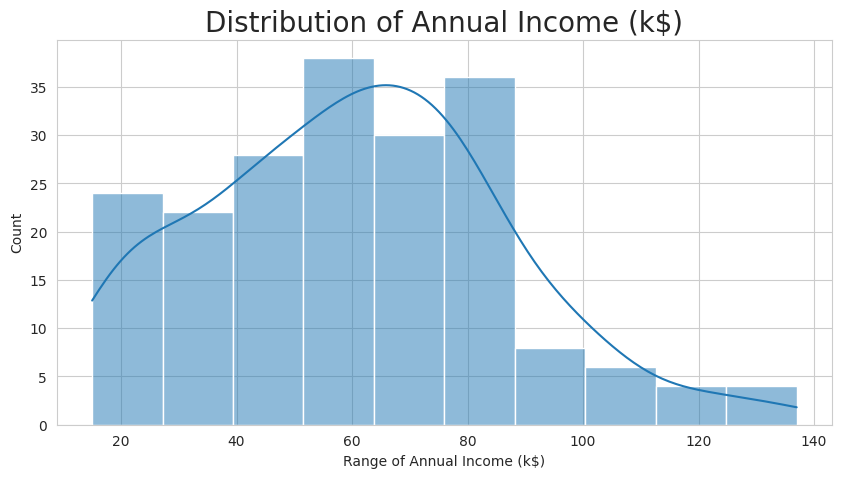

In [172]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.histplot(df['Annual Income (k$)'],kde=True)
plt.title('Distribution of Annual Income (k$)',fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

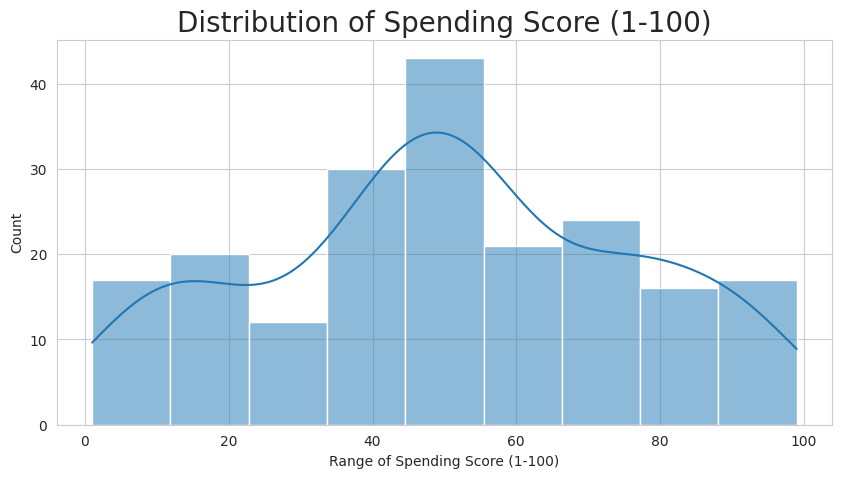

In [173]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.histplot(df['Spending Score (1-100)'],kde=True)
plt.title('Distribution of Spending Score (1-100)',fontsize=20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

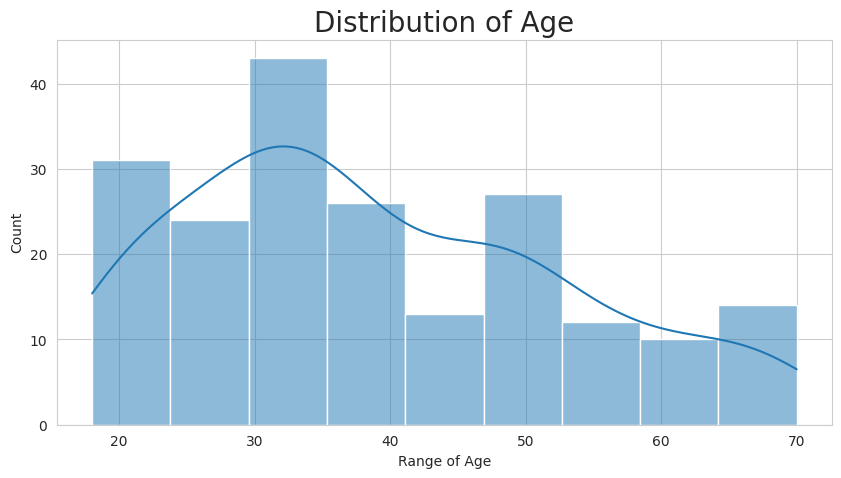

In [174]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.histplot(df['Age'],kde=True)
plt.title('Distribution of Age',fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Gender')

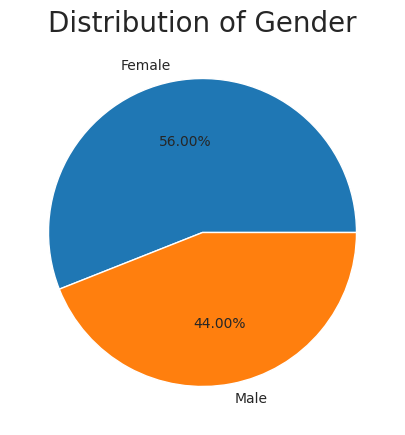

In [175]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.2f%%')
plt.title('Distribution of Gender',fontsize=20)

# 1

In [176]:
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [177]:
X=df1[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Spending Score (1-100)')

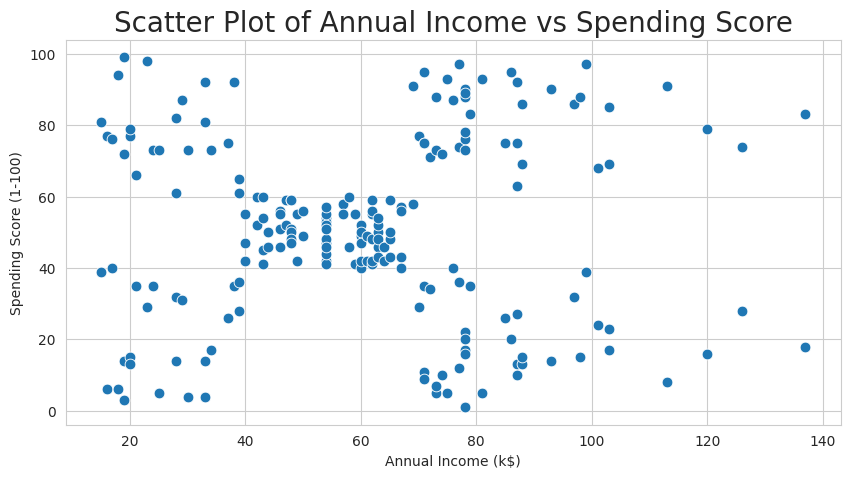

In [178]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1,s=60)
plt.title('Scatter Plot of Annual Income vs Spending Score',fontsize=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [179]:
from sklearn.cluster import KMeans

In [180]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [181]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

Text(0, 0.5, 'WCSS')

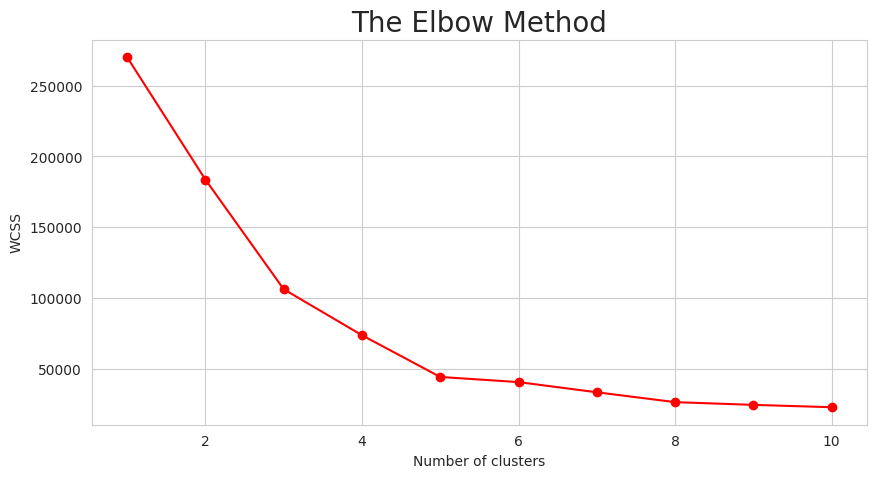

In [182]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='o',color='red')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [183]:
km1=KMeans(n_clusters=5)
km1.fit(X)
y=km1.predict(X)
df1['label']=y
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [184]:
from sklearn.metrics import silhouette_score
# Simple accuracy check
accuracy = silhouette_score(X, df1['label'])
print(f"Clustering Accuracy: {accuracy:.3f}")

Clustering Accuracy: 0.554


Text(0, 0.5, 'Spending Score (1-100)')

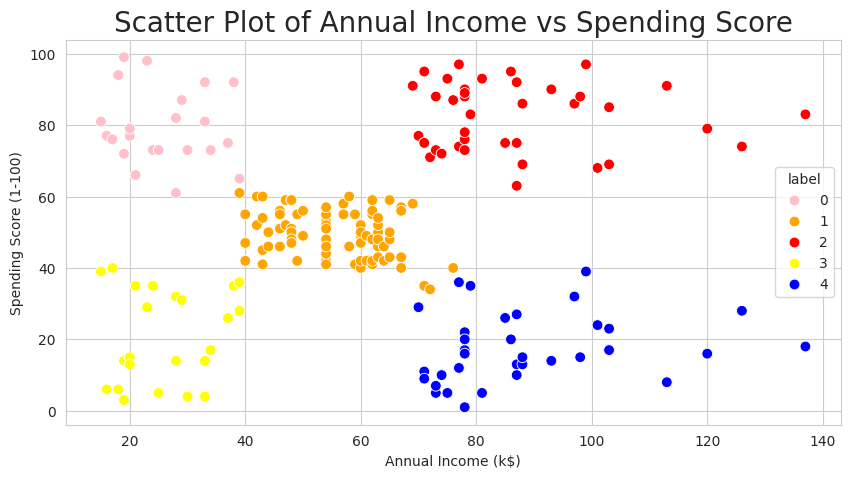

In [185]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1,hue='label',s=60,palette=['pink','orange','red','yellow','blue'])
plt.title('Scatter Plot of Annual Income vs Spending Score',fontsize=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# 2


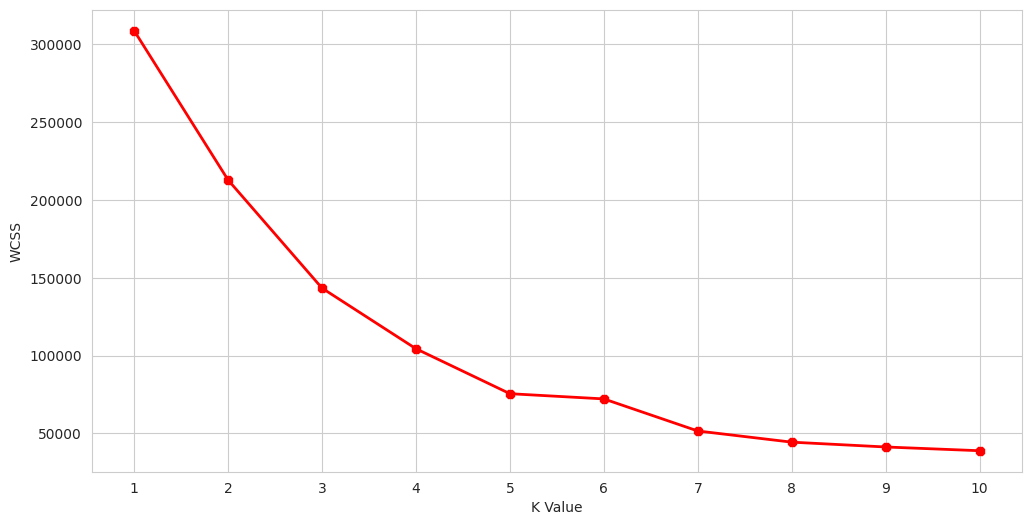

In [186]:
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [187]:
km2=KMeans(n_clusters=5)
km2.fit(X2)
y2=km2.predict(X2)
df1['label']=y2
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [188]:
from sklearn.metrics import silhouette_score
accuracy1 = silhouette_score(X2, df1['label'])
print(f"Clustering Accuracy: {accuracy1:.3f}")

Clustering Accuracy: 0.444


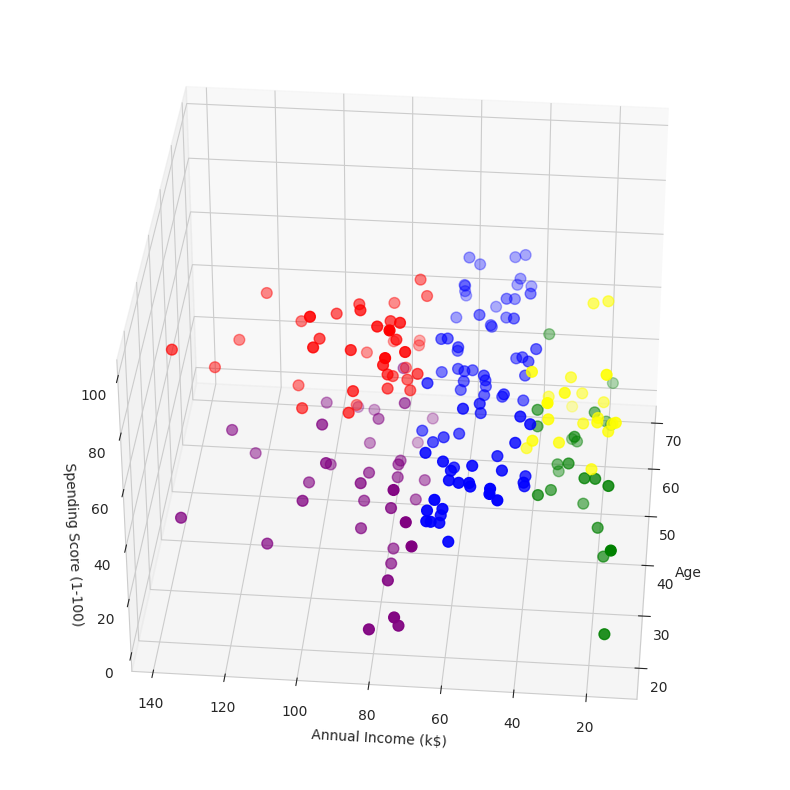

In [189]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [190]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 2nd group= 79
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127]
--------------------------------------------
Number of customer in 3rd group= 37
They are - [125 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161
 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197
 199]
--------------------------------------------
Number of customer in 4th group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 

In [191]:
import pickle
filename='mall_customer_segmentation.pkl'
pickle.dump(km1,open(filename,'wb'))